# Project: SpaceY Rocket Company Costs

</br>

### Summary:


---

</br> 

## 1. Business Understanding



<p>The commercial space age is here, companies are making space travel affordable for everyone. Perhaps the most successful company nowdays is SpaceX. SpaceX’s accomplishments include: Sending spacecraft to the International Space Station. Starlink, a satellite internet constellation providing satellite Internet access. Sending manned missions to Space. One reason SpaceX can do this is the rocket launches are relatively inexpensive. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upwards of 165 million dollars each, much of the savings is because SpaceX can reuse the first stage. 

<b>Hypothesis:</b> If we can determine if the first stage will land, we can determine the cost of a launch.

The payload is enclosed in the fairings. Stage two, or the second stage, helps bring the payload to orbit, but most of the work is done by the first stage. This stage does most of the work and is much larger than the second stage. This stage is quite large and expensive. Unlike other rocket providers, SpaceX's Falcon 9 can recover the first stage. Sometimes the first stage does not land. Sometimes it will crash as shown in this clip. Other times, Space X will sacrifice the first stage due to the mission parameters like payload, orbit, and customer.

'Space Y' is a rocket launch company that would like to compete with SpaceX founded by Billionaire industrialist 'Allon Musk'. Our job is to determine the price of each launch. We will do this by gathering information about Space X and creating dashboards for our team. We will also determine if SpaceX will reuse the first stage. Instead of using rocket science to determine if the first stage will land successfully, we will train a machine learning model and use public information to predict if SpaceX will reuse the first stage.</p>

</br>

<img style='text-align:left' src='https://imgix.bustle.com/inverse/1d/8d/8c/94/286b/45f4/94d4/edfff0ce4c36/comment4wehomrle79utxlypqvm4ixdojlhfdfhjpg.jpeg?w=1200&h=630&fit=crop&crop=faces&fm=jpg' width="600">
<p style='text-align:centerleft'>source: Reddit</p> 

---

</br>

## 2. Data Understanding

- Collecting
- Transforming
- Selecting
- Cleaning

We will be working with SpaceX launch data that is gathered from the SpaceX REST API. This API will give us data about launches, including information about the rocket used, payload delivered, launch specifications, landing specifications, and landing outcome. 

<b>Our goal</b> is to use this data to predict whether SpaceX will attempt to land a rocket or not.

</br>

### 2.1 - Data Collecting

</br>

We will use get request to the SpaceX API:

In [1]:
import requests
import pandas as pd
import numpy as np
import datetime

# To print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# To print all of the data in a feature
pd.set_option('display.max_colwidth', None)

In [2]:
url='https://api.spacexdata.com/v4/launches/past'

response = requests.get(url)

#response.content

In [3]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

response.status_code #200 is OK

200

</br>

### 2.2 - Data Transforming

</br>

We will use <code>json_normalize</code> function:

In [4]:
data = pd.json_normalize(response.json())

In [5]:
data.head(2)

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/94/f2/NN6Ph45r_o.png,https://images2.imgbox.com/5b/02/QcxHUb5V_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]","Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/f9/4a/ZboXReNb_o.png,https://images2.imgbox.com/80/a2/bkWotCIS_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN


</br>

### 2.3 - Data Selecting

</br>

The column 'rocket' is an ID for each launch. We will use the API again to get information about the launches using the given IDs. We will use just a few interesting columns:

In [6]:
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]
data.head()

,rocket,payloads,launchpad,cores,flight_number,date_utc
0,5e9d0d95eda69955f709d1eb,[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",1,2006-03-24T22:30:00.000Z
1,5e9d0d95eda69955f709d1eb,[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",2,2007-03-21T01:10:00.000Z
2,5e9d0d95eda69955f709d1eb,"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",3,2008-08-03T03:34:00.000Z
3,5e9d0d95eda69955f709d1eb,[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",4,2008-09-28T23:15:00.000Z
4,5e9d0d95eda69955f709d1eb,[5eb0e4b7b6c3bb0006eeb1e6],5e9e4502f5090995de566f86,"[{'core': '5e9e289ef359184f103b2627', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5,2009-07-13T03:35:00.000Z


</br>

We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket:

In [7]:
data = data[data['cores'].map(len)==1]

</br>

Since the payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature:

In [8]:
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

</br>

Converting the date_utc to a datetime:

In [9]:
data['date'] = pd.to_datetime(data['date_utc']).dt.date

</br>

Counting launches before 2020-11-13:

In [10]:
data = data[data['date'] <= datetime.date(2020, 11, 13)]

In [11]:
data.head(2)

,rocket,payloads,launchpad,cores,flight_number,date_utc,date
0,5e9d0d95eda69955f709d1eb,5eb0e4b5b6c3bb0006eeb1e1,5e9e4502f5090995de566f86,"{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",1,2006-03-24T22:30:00.000Z,2006-03-24
1,5e9d0d95eda69955f709d1eb,5eb0e4b6b6c3bb0006eeb1e2,5e9e4502f5090995de566f86,"{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",2,2007-03-21T01:10:00.000Z,2007-03-21


</br>

We should know which rocket each ID corresponds to:

In [12]:
RocketVersion = [] #global variable

def getRocketVersion(data):
    '''Takes the dataset and uses the rocket column to call 
    the API and append the data to the list'''
    
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        RocketVersion.append(response['name'])

In [13]:
getRocketVersion(data)

In [14]:
RocketVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1']

</br>

We would like to know the 'launchpad' (launchsite):

In [15]:
#global variables:
LaunchPad = []
Longitude = []
Latitude = []

def getLaunchPad(data):
    '''Takes the dataset and uses the launchpad column to call 
    the API and append the data to the list'''
    
    for x in data['launchpad']:
       if x:
         response = requests.get('https://api.spacexdata.com/v4/launchpads/'+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchPad.append(response['name'])

getLaunchPad(data)

LaunchPad[0:5]

['Kwajalein Atoll',
 'Kwajalein Atoll',
 'Kwajalein Atoll',
 'Kwajalein Atoll',
 'Kwajalein Atoll']

</br>

We would like to know the Payload Mass and the Orbit that it is going to:

In [16]:
#global variables:
PayloadMass = []
Orbit = []

def getPayload(data):
    '''Takes the dataset and uses the payloads column to call 
    the API and append the data to the list'''
    
    for load in data['payloads']:
       if load:
        response = requests.get('https://api.spacexdata.com/v4/payloads/'+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

getPayload(data)

</br>

From the core column we'd like to know the <u>outcome</u> of the landing, the <u>type</u> of the landing, <u>number of flights</u> with that core, whether <u>gridfins</u> were used, wheter <u>the core is reused</u>, wheter <u>legs were used</u>, the <u>landing pad used</u>, the <u>block of the core</u> which is a number used to seperate version of cores, the <u>number of times</u> this specific <u>core has been reused</u>, and the <u>serial</u> of the core:

In [17]:
#global variables:
Block = []
ReusedCount = []
Serial = []

Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []

def getCore(data):
    '''Takes the dataset and uses the core column to call 
    the API and append the data to the list'''
    
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])
            
getCore(data)

</br>

Finally we have data to build our dataframe. We'll combine the columns into a dictionary and create a Pandas dataframe:

In [18]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'RocketVersion':RocketVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchPad':LaunchPad,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

df = pd.DataFrame(data=launch_dict)

df.head()

,FlightNumber,Date,RocketVersion,PayloadMass,Orbit,LaunchPad,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,3,2008-08-03,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1C,167.743129,9.047721
3,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
4,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721


<br>

Filtering de dataframe just to get Falcon 9 launches:

In [19]:
df_falcon9 = df[df['RocketVersion']=='Falcon 9']
df_falcon9.head()

,FlightNumber,Date,RocketVersion,PayloadMass,Orbit,LaunchPad,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
5,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
6,7,2010-12-08,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0004,-80.577366,28.561857
7,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
8,9,2012-10-08,Falcon 9,400.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0006,-80.577366,28.561857
9,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857


</br>

FlightNumber need to be reset:

In [20]:
df_falcon9.loc[:,'FlightNumber'] = list(range(1, df_falcon9.shape[0]+1))
df_falcon9.head()

C:\Users\User\AppData\Local\Temp\ipykernel_2476\4151362501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_falcon9.loc[:,'FlightNumber'] = list(range(1, df_falcon9.shape[0]+1))


,FlightNumber,Date,RocketVersion,PayloadMass,Orbit,LaunchPad,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
5,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
6,2,2010-12-08,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0004,-80.577366,28.561857
7,3,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
8,4,2012-10-08,Falcon 9,400.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0006,-80.577366,28.561857
9,5,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857


</br>

### 2.4 - Data Cleaning

</br>

Dealing with these missing values:

In [21]:
df_falcon9.isnull().sum()

FlightNumber      0
Date              0
RocketVersion     0
PayloadMass       6
Orbit             0
LaunchPad         0
Outcome           0
Flights           0
GridFins          0
Reused            0
Legs              0
LandingPad       31
Block             0
ReusedCount       0
Serial            0
Longitude         0
Latitude          0
dtype: int64

In [22]:
df_falcon9['PayloadMass'].fillna(df_falcon9['PayloadMass'].mean(), inplace=True)
    
df_falcon9.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_2476\1276849651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_falcon9['PayloadMass'].fillna(df_falcon9['PayloadMass'].mean(), inplace=True)


FlightNumber      0
Date              0
RocketVersion     0
PayloadMass       0
Orbit             0
LaunchPad         0
Outcome           0
Flights           0
GridFins          0
Reused            0
Legs              0
LandingPad       31
Block             0
ReusedCount       0
Serial            0
Longitude         0
Latitude          0
dtype: int64

</br>

Saving the df to csv:

In [23]:
df_falcon9.to_csv('df_falcon9.csv', index=False)

</br>

### 2.5 Features:

- <b>FlightNumber:</b> from 1 to up;
- <b>Date:</b> launch date;
- <b>RocketVersion:</b> just Falcon9 after selecting;
- <b>PayloadMass:</b> payload kg;
- <b>Orbit:</b> VLEO (very low earth), LEO (low Earth), GEO (geostationary = high altitude), HEO (highly elliptical), ISS (international space station), GTO (geosynchronous), and so on;
- <b>LaunchPad:</b> launch site name = Cape Canaveral 40 VAFB SLC 4E , Vandenberg Air Force Base 4E (SLC-4E), Kennedy Space Center 39A KSC LC 39A;
- <b>Outcome:</b> False (landing unsuccessful), True (landing successful), None (represents a failure to land);
- <b>Flights:</b> how many times that rocket have fly;
- <b>Gridfins:</b> flight control systems = False (not reused), True (reused);
- <b>Reused:</b> Rocket = False (not reused), True (reused);
- <b>Legs:</b> landing legs = False (not reused), True (reused);
- <b>LandingPad:</b> landing site name;
- <b>ReusedCount:</b> reused coutn of rockets;
- <b>Serial:</b> rocket serial number;
- <b>Long and Lat:</b> of the launch.

The column Outcome indicates if the first stage successfully landed. There are 8 of them, for example. True means the booster successfully landed to a drone ship. False means the mission outcome was unsuccessfully landed to a drone ship. We would like landing outcomes to be converted to Classes y (either 0 or 1). 0 is a bad outcome, that is, the booster did not land. 1 is a good outcome, that is, the booster did land. The variable Y will represent the classification variable that represents the outcome of each launch.

In [24]:
df.dtypes

FlightNumber       int64
Date              object
RocketVersion     object
PayloadMass      float64
Orbit             object
LaunchPad         object
Outcome           object
Flights            int64
GridFins            bool
Reused              bool
Legs                bool
LandingPad        object
Block            float64
ReusedCount        int64
Serial            object
Longitude        float64
Latitude         float64
dtype: object

---

</br>

## 3. EDA - Exploratory Data Analysis

   - Inicial Analysis
   - Using SQL
   - Static Data Visualization with Matplotlib and Seaborn
   - Interactive Data Visualization using maps 
   - Interactive Data Visualization using graphs

</br>

### 3.1 Inicial Analysis

</br>

Launch Site:

In [25]:
df['LaunchPad'].value_counts()

CCSFS SLC 40       60
KSC LC 39A         23
VAFB SLC 4E        15
Kwajalein Atoll     5
Name: LaunchPad, dtype: int64

</br>

Aims to which orbit:

In [26]:
df['Orbit'].value_counts()

GTO      30
ISS      22
VLEO     15
LEO      13
PO       10
SSO       6
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

</br>

Outcomes:

In [27]:
df['Outcome'].value_counts()

True ASDS      43
None None      29
True RTLS      14
False ASDS      7
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

</br>

Let's create a new column where the value is 1 if the landing was successful and 0 if the landing was unsuccessful:

In [28]:
landing_class = []

for instance in df['Outcome']:
    if 'True' in instance:
        landing_class.append(1)
    else:
        landing_class.append(0)
        
df['Class'] = landing_class

df[['Class']].head()

,Class
0,0
1,0
2,0
3,0
4,0


In [29]:
df.head()

,FlightNumber,Date,RocketVersion,PayloadMass,Orbit,LaunchPad,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721,0
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721,0
2,3,2008-08-03,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1C,167.743129,9.047721,0
3,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721,0
4,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721,0


</br>

Success landing rate:

In [30]:
print('Success landing rate %%: %.2f' % (df['Class'].mean() * 100))

Success landing rate %: 60.19


</br>

Saving the new df to csv:

In [31]:
df.to_csv('df_falcon9_v2.csv', index=False)

</br>

Successful Landing Outcome by Orbit type:

In [32]:
df_grouped = df.groupby(by='Orbit')['Class'].sum()
df_grouped

Orbit
ES-L1     1
GEO       1
GTO      15
HEO       1
ISS      13
LEO       5
MEO       2
PO        6
SO        0
SSO       5
VLEO     13
Name: Class, dtype: int64

</br>

### 3.2 EDA using SQL 

</br>

From now on we upload the last file on a IBM DB2 database and access it through the cloud with IBM credentials and SQL.

In [33]:
#We don't need to install as we are using a notebook inside IBM Cloud

#!pip install --force-reinstall ibm_db==3.1.0 ibm_db_sa==0.3.3
#!pip install sqlalchemy==1.3.24
#!pip uninstall ipython-sql -y
#!pip install ipython-sql==0.4.1

In [34]:
#We don't need to import these as we are running a notebook inside IBM Cloud

#import ibm_db
#import ibm_db_sa
#import sqlalchemy

In [35]:
%load_ext sql

</br>

Using DB2 magic credentials:

<code>%sql ibm_db_sa://my-username:my-password@my-hostname:my-port/my-db-name?security=SSL</code>

In [36]:
# %sql ibm_db_sa://

In [37]:
import csv, sqlite3

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

%sql sqlite:///my_data1.db

In [38]:
df_sql = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df_sql.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [39]:
%%sql

SELECT * FROM SPACEXTBL
LIMIT 5;

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing _Outcome
04-06-2010,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
08-12-2010,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
22-05-2012,07:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
08-10-2012,00:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
01-03-2013,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


</br>

Correcting names of some columns:

In [40]:
%%sql

ALTER TABLE SPACEXTBL
RENAME COLUMN 'Landing _Outcome' TO Landing_Outcome;

 * sqlite:///my_data1.db
Done.


[]

In [41]:
%%sql

ALTER TABLE SPACEXTBL
RENAME COLUMN PAYLOAD_MASS__KG_ TO Payload_Mass_Kg;

 * sqlite:///my_data1.db
Done.


[]

</BR>

Names of the unique launch sites:

In [42]:
%%sql

SELECT DISTINCT Launch_Site FROM SPACEXTBL;

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


</br>

Total payload mass carried by boosters launched by NASA and Other Customers:

In [43]:
%%sql

SELECT Customer AS ALL_NASA, SUM(Payload_Mass_Kg) Total_Payload_Carried_kg FROM SPACEXTBL
WHERE Customer LIKE '%NASA%';

 * sqlite:///my_data1.db
Done.


ALL_NASA,Total_Payload_Carried_kg
NASA (COTS) NRO,107010


</br>

Total payload mass carried:

In [44]:
%%sql

SELECT SUM(Payload_Mass_Kg) Total_Payload_Carried_kg FROM SPACEXTBL

 * sqlite:///my_data1.db
Done.


Total_Payload_Carried_kg
619967


</br>

NASA payload / Total payload:

In [45]:
%%sql

SELECT ROUND(SUM(Payload_Mass_Kg) * 100/ (SELECT SUM(Payload_Mass_Kg) FROM SPACEXTBL),2) NASA_Pct_of_Total
FROM SPACEXTBL
WHERE Customer LIKE '%NASA%'
;

 * sqlite:///my_data1.db
Done.


NASA_Pct_of_Total
17.0


</br>

Average payload mass carried by booster version:

In [46]:
%%sql

SELECT ROUND(AVG(Payload_Mass_Kg),2) Avg_Payload_Carried_kg FROM SPACEXTBL;

 * sqlite:///my_data1.db
Done.


Avg_Payload_Carried_kg
6138.29


</br>

Sucessful and Fail Landings:

In [47]:
%%sql

SELECT COUNT(Landing_Outcome) AS Sucess_Landing, (SELECT COUNT(Landing_Outcome) AS Sucess_Landing FROM SPACEXTBL
WHERE Landing_Outcome LIKE '%ailure%') AS Fail_Landing FROM SPACEXTBL
WHERE Landing_Outcome LIKE '%uccess%';

 * sqlite:///my_data1.db
Done.


Sucess_Landing,Fail_Landing
61,10


</br>

Number of landings by year:

In [48]:
%%sql

SELECT substr(Date,7,4) year, COUNT(Landing_Outcome) AS Number_of_Landings
FROM SPACEXTBL
GROUP BY substr(Date,7,4)
ORDER BY Number_of_Landings DESC;

 * sqlite:///my_data1.db
Done.


year,Number_of_Landings
2020,24
2018,20
2017,18
2019,11
2016,8
2015,7
2014,6
2013,3
2012,2
2010,2


</br>

### 3.3 EDA using Data Visualization

</br>


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

</br>

As the flight number increases, the first stage is more likely to land successfully:

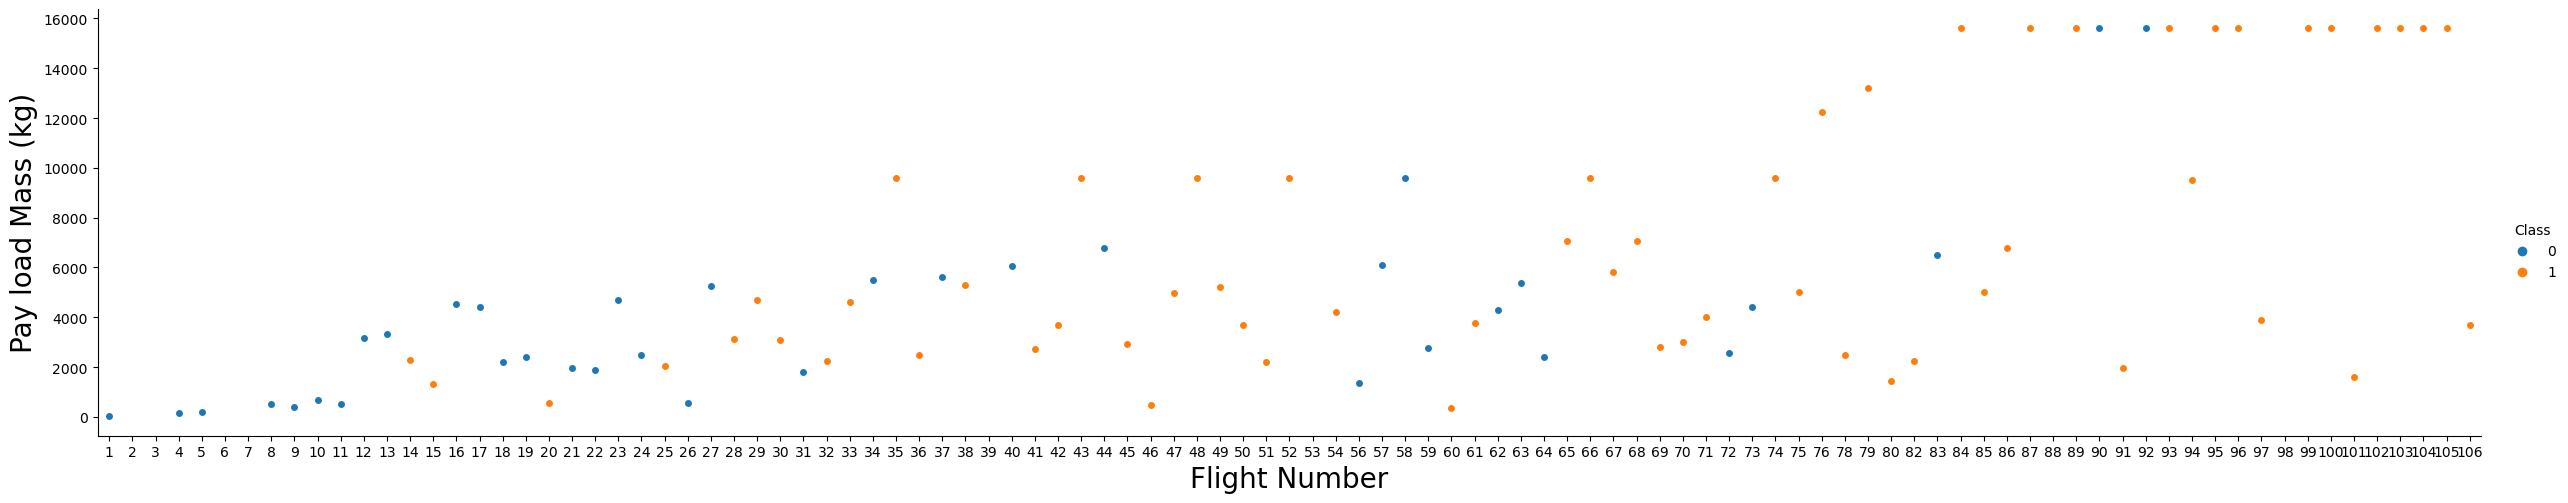

In [50]:
sns.catplot(data=df, y='PayloadMass', x='FlightNumber', hue='Class', aspect = 5)
plt.xlabel('Flight Number',fontsize=20)
plt.ylabel('Pay load Mass (kg)',fontsize=20)
plt.show()

</br>

Cape Canaveral Space Launch Complex 40 was more used in the beginning and nowadays:

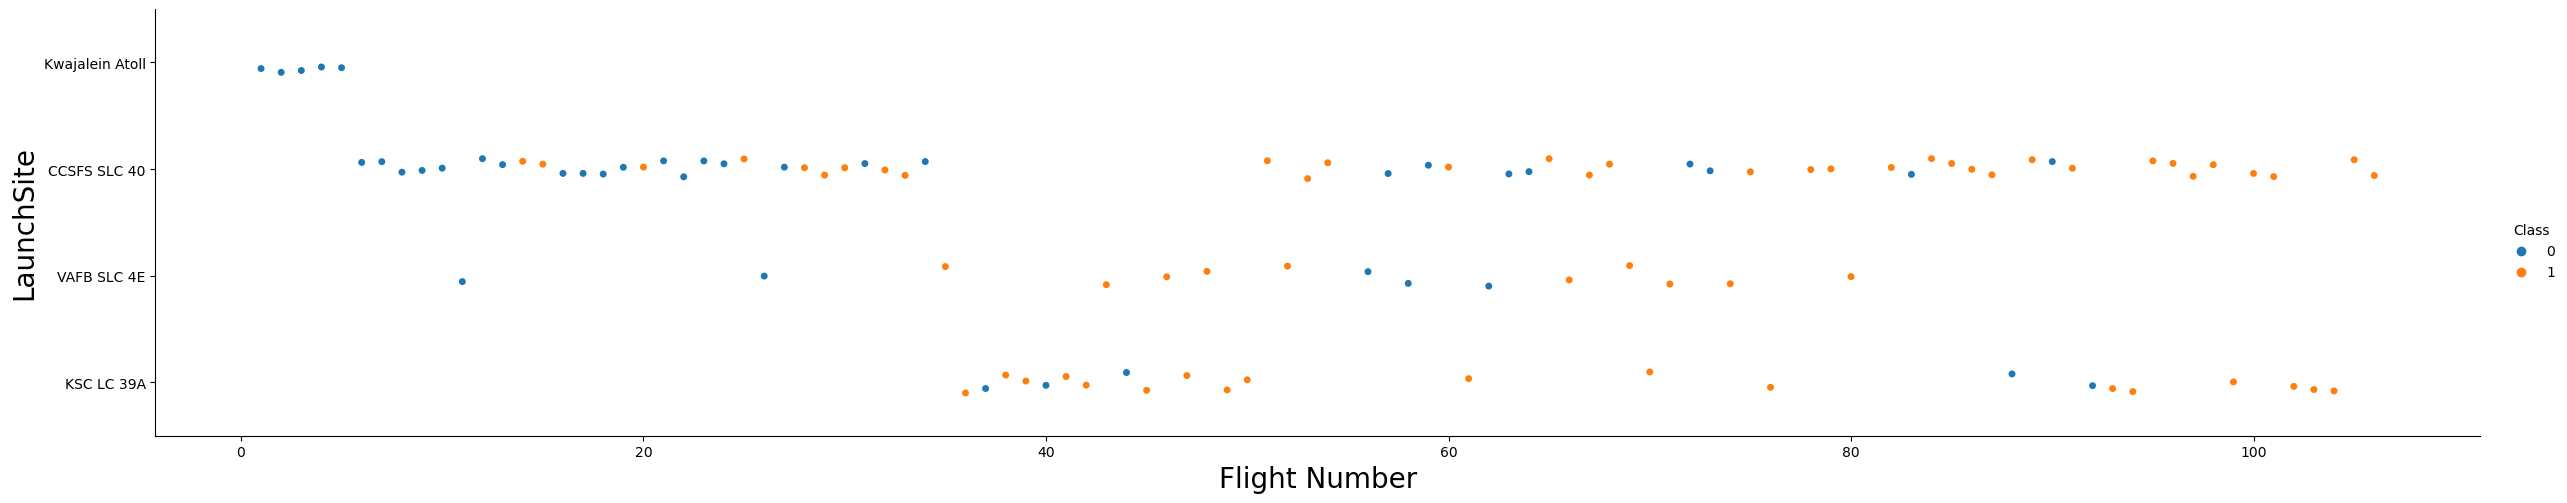

In [51]:
sns.catplot(y='LaunchPad', x='FlightNumber', hue='Class', data=df, aspect = 5)
plt.xlabel('Flight Number',fontsize=20)
plt.ylabel('LaunchSite',fontsize=20)
plt.show()

</br>

In Vandenberg Space Launch Complex 4 there are no rockets launched for heavypayload mass (greater than 10000):

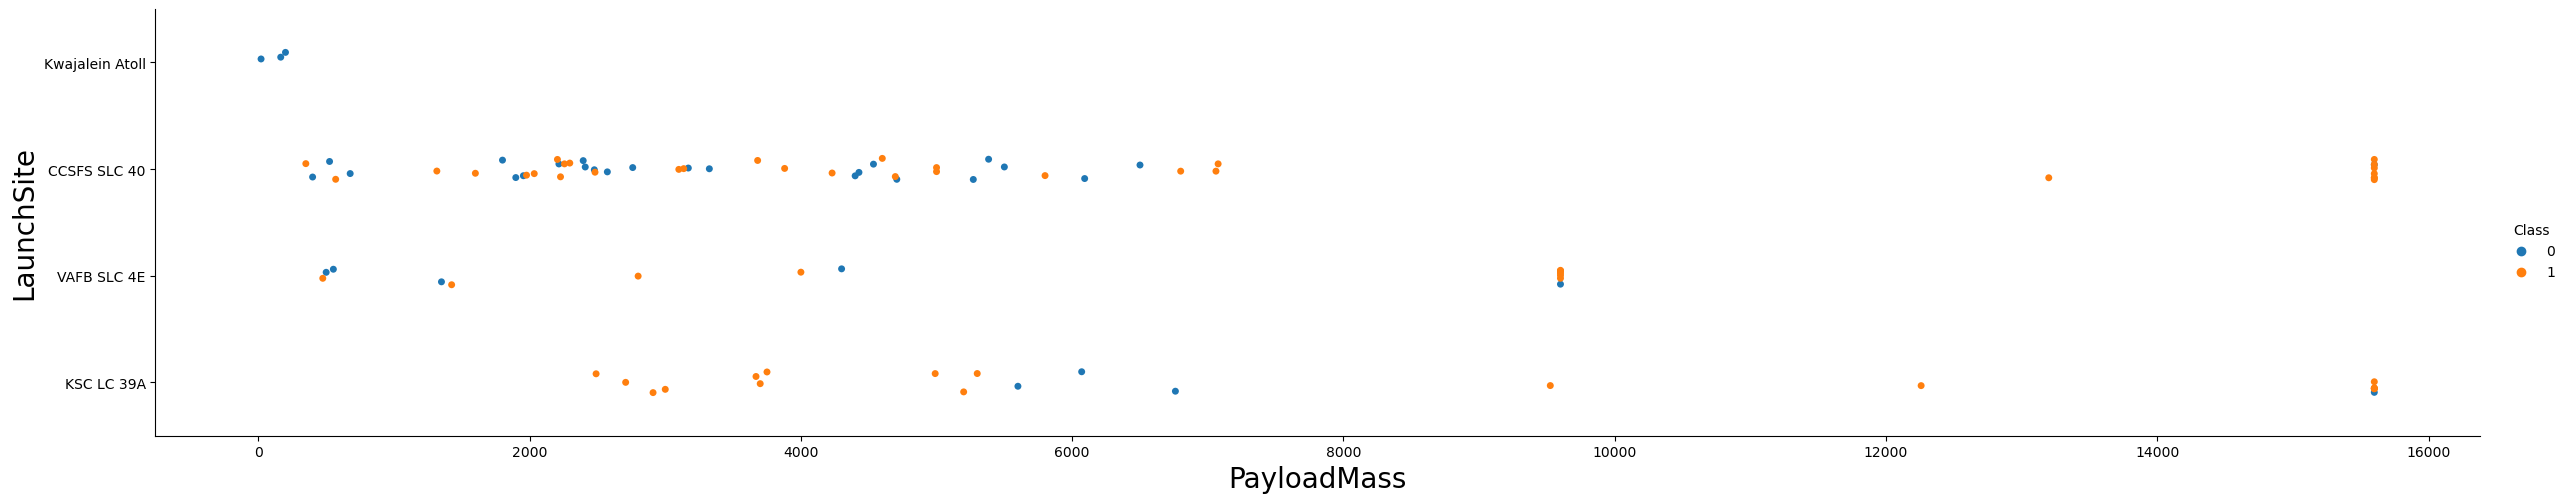

In [52]:
sns.catplot(y='LaunchPad', x='PayloadMass', hue='Class', data=df, aspect = 5)
plt.xlabel('PayloadMass',fontsize=20)
plt.ylabel('LaunchSite',fontsize=20)
plt.show()

</br>

Orbit vs Success rate:

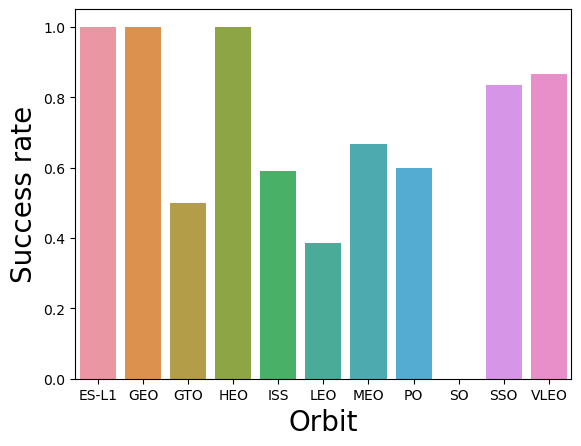

In [53]:
df_group = df.groupby(['Orbit']).agg(Success_mean =('Class', 'mean'))
df_group = df_group.reset_index()

sns.barplot(y='Success_mean', x='Orbit', data=df_group)
plt.xlabel('Orbit',fontsize=20)
plt.ylabel('Success rate',fontsize=20)
plt.show()

</br>

Orbit vs. Flight Number vs Sucessful landings::

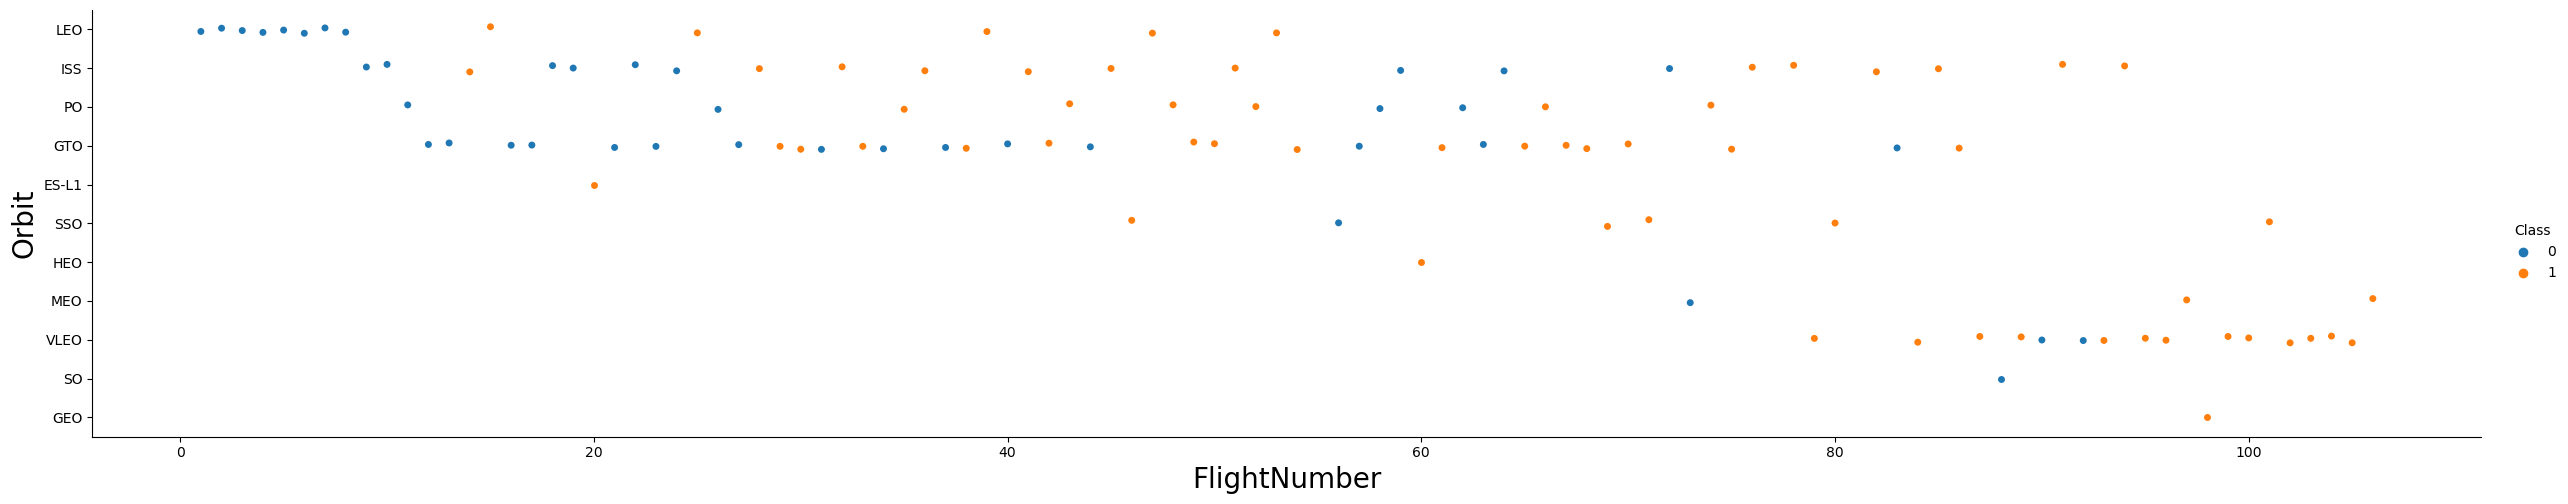

In [54]:
sns.catplot(y='Orbit', x='FlightNumber', hue='Class', data=df, aspect = 5)
plt.xlabel('FlightNumber',fontsize=20)
plt.ylabel('Orbit',fontsize=20)
plt.show()

</br>

Payload vs Orbit vs Sucessful landings:

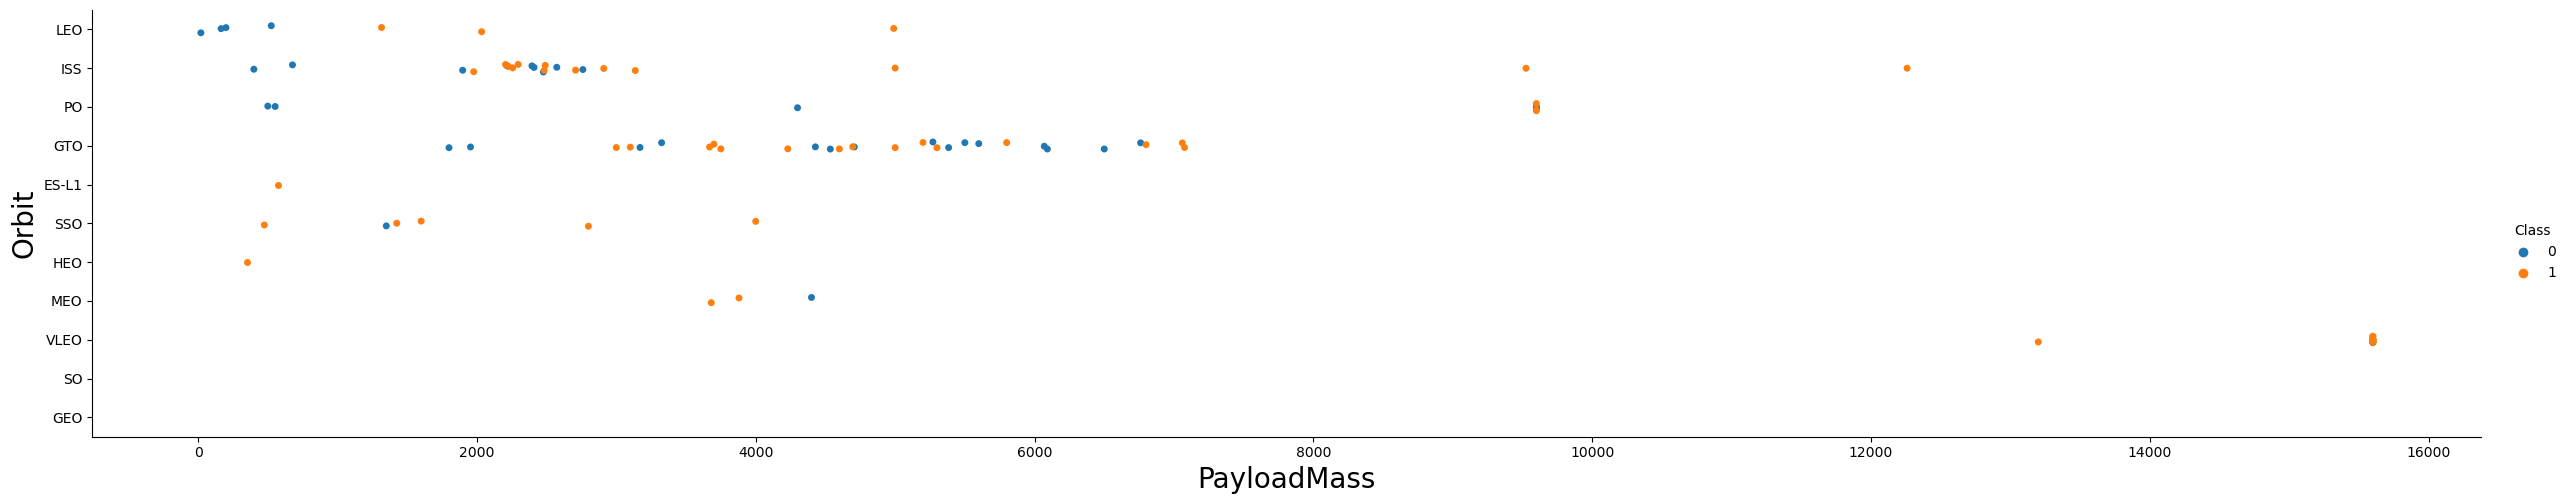

In [55]:
sns.catplot(y='Orbit', x='PayloadMass', hue='Class', data=df, aspect = 5)
plt.xlabel('PayloadMass',fontsize=20)
plt.ylabel('Orbit',fontsize=20)
plt.show()

</br>

Launch success yearly trend:

In [56]:
year = []

for i in df['Date']:
    year.append(i.strftime('%Y')) 

df['Date'] = year
df.head()

,FlightNumber,Date,RocketVersion,PayloadMass,Orbit,LaunchPad,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2006,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721,0
1,2,2007,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721,0
2,3,2008,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1C,167.743129,9.047721,0
3,4,2008,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721,0
4,5,2009,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721,0


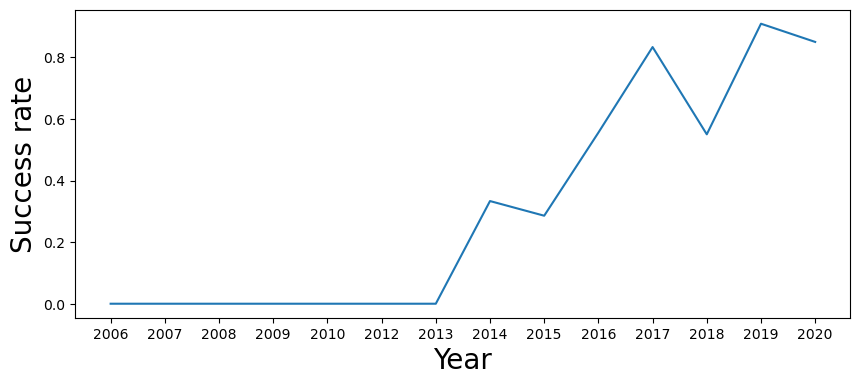

In [57]:
df_group2 = df.groupby(['Date']).agg(Success_mean =('Class', 'mean'))
df_group2 = df_group2.reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(y='Success_mean', x='Date', data=df_group2)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Success rate',fontsize=20)
plt.show()

</br>

### 3.4 Interactive Data Visualization with maps

- All launch sites are in proximity to the Equator line and very close to the coast
- Info about success rate on the map
- The Launch sites are close to the coast, railways and highways. Always less than 1Km. And near 10Km away from any city

In [58]:
#pip install folium

In [59]:
import folium

# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster

# Import folium MousePosition plugin
from folium.plugins import MousePosition

# Import folium DivIcon plugin
from folium.features import DivIcon

In [60]:
launch_sites_df = df[['LaunchPad', 'Latitude', 'Longitude', 'Class']]
launch_sites_df = launch_sites_df.groupby(['LaunchPad'], as_index=False).first()
launch_sites_df = launch_sites_df[['LaunchPad', 'Latitude', 'Longitude']]
launch_sites_df

,LaunchPad,Latitude,Longitude
0,CCSFS SLC 40,28.561857,-80.577366
1,KSC LC 39A,28.608058,-80.603956
2,Kwajalein Atoll,9.047721,167.743129
3,VAFB SLC 4E,34.632093,-120.610829


</br>

##### 3.3.1 All launch sites are in proximity to the Equator line and very close to the coast:

In [61]:
# Initial the map
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=4)

circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))

marker = folium.map.Marker(nasa_coordinate, icon=DivIcon(icon_size=(20,20), icon_anchor=(0,0), 
                                                         html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
# For each launch site we put a Circle and Label name

CCAFS_LC_40_coordinate = [28.562302 , -80.577356]
CCAFS_LC_40_circle = folium.Circle(CCAFS_LC_40_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('Cape Canaveral A'))
CCAFS_LC_40_marker = folium.map.Marker(CCAFS_LC_40_coordinate, icon=DivIcon(icon_size=(20,20), icon_anchor=(0,0), 
                                                         html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'Cape Canaveral A',
        )
    )

CCAFS_SLC_40_coordinate = [28.563197 , -80.576820]
CCAFS_SLC_40_circle = folium.Circle(CCAFS_SLC_40_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('Cape Canaveral B'))
CCAFS_SLC_40_marker = folium.map.Marker(CCAFS_SLC_40_coordinate, icon=DivIcon(icon_size=(20,20), icon_anchor=(0,0), 
                                                         html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'Cape Canaveral B',
        )
    )

KSC_LC_39A_coordinate = [28.573255 , -80.646895] 
KSC_LC_39A_circle = folium.Circle(KSC_LC_39A_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('Kennedy Space Center 39A'))
KSC_LC_39A_marker = folium.map.Marker(KSC_LC_39A_coordinate, icon=DivIcon(icon_size=(20,20), icon_anchor=(0,0), 
                                                         html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'Kennedy Space Center 39A',
        )
    )

VAFB_SLC_4E_coordinate = [34.632834 , -120.610745]
VAFB_SLC_4E_circle = folium.Circle(VAFB_SLC_4E_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('Vandenberg 4'))
VAFB_SLC_4E_marker = folium.map.Marker(VAFB_SLC_4E_coordinate, icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0), 
                                                         html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'Vandenberg 4',
        )
    )

site_map.add_child(circle)
site_map.add_child(CCAFS_LC_40_circle)
site_map.add_child(CCAFS_SLC_40_circle)
site_map.add_child(KSC_LC_39A_circle)
site_map.add_child(VAFB_SLC_4E_circle)
site_map.add_child(marker)
site_map.add_child(CCAFS_LC_40_marker)
site_map.add_child(CCAFS_SLC_40_marker)
site_map.add_child(KSC_LC_39A_marker)
site_map.add_child(VAFB_SLC_4E_marker)

</br>

##### 3.3.2 Info about success rate on the map:

In [62]:
success_df = df[['LaunchPad', 'Latitude', 'Longitude', 'Class']]

marker_cluster = MarkerCluster()

site_map.add_child(marker_cluster)

for i, classe in success_df.iterrows():
    coordinate = [success_df['Latitude'][i] , success_df['Longitude'][i]]
    classe = success_df['Class'][i]
    if classe == 0:
        marker = folium.Marker(coordinate, icon=folium.Icon(color='white', icon_color='#FF0000')) #red
        
    else:
        marker = folium.Marker(coordinate, icon=folium.Icon(color='white', icon_color='#00FF00')) #green
    
    marker_cluster.add_child(marker)
    i = i + 1
    
site_map

In [63]:
#Using mouse position to see lt and long

formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

In [64]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    ''' Approximate radius of earth in km
    '''
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

</br>

##### 3.3.3 The Launch sites are close to the coast, railways and highways. Always less than 1Km. And near 10Km away from any city: 

(move the map to close to Cape Canaveral and see the lines and distances)

In [65]:
distance_coastline_west = calculate_distance(34.63309, -120.61051, 34.63611, -120.62491)
distance_coastline_west

1.3600129637542169

In [66]:
distance_coastline_cape = calculate_distance(28.5625, -80.57724, 28.56356, -80.56841)
distance_coastline_cape

0.8706427169066633

In [67]:
coordinate = [34.63611, -120.62491]

distance_marker_west = folium.Marker(
    coordinate,
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_coastline_west),
        )
    )

In [68]:
coordinate2 = [28.56356, -80.56841]

distance_marker_cape = folium.Marker(
    coordinate2,
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_coastline_cape),
        )
    )

In [69]:
coordinates_west = [[34.63309, -120.61051], [34.63611, -120.62491]]

lines=folium.PolyLine(locations=coordinates_west, weight=1)
site_map.add_child(lines)

In [70]:
coordinates_cape = [[28.5625, -80.57724], [28.56356, -80.56841]]

lines=folium.PolyLine(locations=coordinates_cape, weight=1)
site_map.add_child(lines)

In [71]:
distance_railway_cape = calculate_distance(28.5625, -80.57724, 28.56381, -80.58679)

coordinate_railway = [28.56356, -80.56841]

distance_marker_railway = folium.Marker(
    coordinate_railway,
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_railway_cape),
        )
    )

coordinates3 = [[28.5625, -80.57724], [28.56381, -80.58679]]

lines=folium.PolyLine(locations=coordinates3, weight=1)
site_map.add_child(lines)

</br>

### 3.5 Interactive Data Visualization with graphs

(see the interactive dash running the [spacex_dash_app.py](https://link-url-here.org) file in this repository) 

Best success rates:
- Kennedy space center has the largest successful launches and the highest successful launches and rate
- 2.500 to 5.000 payload Kg range has the highest launch success rate and 5.000 to 7.500 the lowest
- The F9 FT Booster version has the highest launch success rate

link to file: [spacex_dash_app.py](https://link-url-here.org)

---

</br>

# 4. Feature Engineering

   - Data Selection for ML models
   - Feature Engineering for ML models

</br>

### 4.1 Data Selecting

</br>

Which features would be import to have in the future ML model:

In [72]:
df = df.dropna()
df = df.reset_index(drop=True)

In [73]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchPad', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchPad,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,19,2395.0,ISS,CCSFS SLC 40,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1012
1,22,1898.0,ISS,CCSFS SLC 40,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1015
2,24,2477.0,ISS,CCSFS SLC 40,1,True,False,True,5e9e3032383ecb6bb234e7ca,1.0,0,B1018
3,25,2034.0,LEO,CCSFS SLC 40,1,True,False,True,5e9e3032383ecb267a34e7c7,1.0,0,B1019
4,26,553.0,PO,VAFB SLC 4E,1,True,False,True,5e9e3033383ecbb9e534e7cc,1.0,0,B1017


</br>

### 4.2 Feature Engineering

</br>

Transformming categorical variables to numerical data to be used by the future machine learning model:

In [74]:
features_one_hot = pd.get_dummies(data=features, columns=['Orbit', 'LaunchPad', 'LandingPad', 'Serial'])

features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SSO,Orbit_VLEO,LaunchPad_CCSFS SLC 40,LaunchPad_KSC LC 39A,LaunchPad_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B1012,Serial_B1015,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1024,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1031,Serial_B1035,Serial_B1036,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,19,2395.0,1,True,False,True,1.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,22,1898.0,1,True,False,True,1.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,24,2477.0,1,True,False,True,1.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,25,2034.0,1,True,False,True,1.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,26,553.0,1,True,False,True,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


</br>

Transformming to float type:

In [75]:
features_one_hot = features_one_hot.astype(float)

print(features_one_hot.dtypes)

FlightNumber                           float64
PayloadMass                            float64
Flights                                float64
GridFins                               float64
Reused                                 float64
Legs                                   float64
Block                                  float64
ReusedCount                            float64
Orbit_GTO                              float64
Orbit_HEO                              float64
Orbit_ISS                              float64
Orbit_LEO                              float64
Orbit_MEO                              float64
Orbit_PO                               float64
Orbit_SSO                              float64
Orbit_VLEO                             float64
LaunchPad_CCSFS SLC 40                 float64
LaunchPad_KSC LC 39A                   float64
LaunchPad_VAFB SLC 4E                  float64
LandingPad_5e9e3032383ecb267a34e7c7    float64
LandingPad_5e9e3032383ecb554034e7c9    float64
LandingPad_5e

---

</br>

# 5. Machine Learning Models

   - Standarising
   - Train, test, split
   - Tuning with GridSearch
   - Logistic regression
   - SVM
   - Decision Tree
   - KNN
   - Choosing best model and best parameters

In [77]:
# Importing Libraries for Machine Learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [78]:
#plot confusion matrix

def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

</br> 

### 5.1 Standarising features:

In [79]:
X = features_one_hot

transform = preprocessing.StandardScaler()

X = transform.fit_transform(X)

In [80]:
y = df['Class'].to_numpy()
y

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

</br>

### 5.2 Train test split:

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [82]:
y_test.shape

(13,)

</br>

### 5.3 Tuning with GridSearch:

In [83]:
#GridSearch hyperparameter tuning

parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

</br>

### 5.4 Logistic regression algorithm:

In [84]:
lr=LogisticRegression()

In [87]:
gscv = GridSearchCV(lr,parameters,scoring='accuracy',cv=6)
logreg_cv = gscv.fit(X_train,y_train)

In [94]:
print('Tuned hpyerparameters:',logreg_cv.best_params_)
print('Accuracy: %.4f' % logreg_cv.score(X_test,y_test))

Tuned hpyerparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.6923


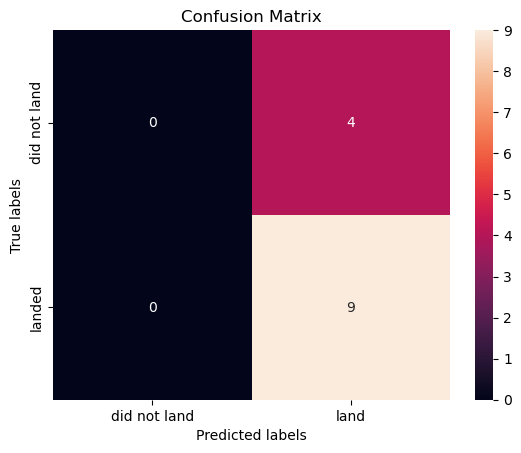

In [95]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

</br>

### 5.5 SVM algorithm:

In [108]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [109]:
gscv = GridSearchCV(svm,parameters,scoring='accuracy',cv=6)
svm_cv = gscv.fit(X_train,y_train)

In [110]:
print('Tuned hpyerparameters:',svm_cv.best_params_)
print('Accuracy: %4.f' % svm_cv.score(X_test,y_test))

Tuned hpyerparameters: {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
Accuracy:    1


</br>

### 5.6 Decision Tree classifier:

In [104]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [105]:
gscv = GridSearchCV(tree,parameters,scoring='accuracy',cv=6)
tree_cv = gscv.fit(X_train,y_train)

In [106]:
print('Tuned hpyerparameters:',tree_cv.best_params_)
print('Accuracy: %.4f' % tree_cv.score(X_test,y_test))

Tuned hpyerparameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
Accuracy: 0.8462


<br>

### 5.7 KNN algorithm:

In [111]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [113]:
gscv = GridSearchCV(KNN,parameters,scoring='accuracy',cv=6)
knn_cv = gscv.fit(X_train,y_train)

In [114]:
print('Tuned hpyerparameters: ',knn_cv.best_params_)
print('Accuracy: %.4f' % knn_cv.score(X_test,y_test))

Tuned hpyerparameters:  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}
Accuracy: 0.6923


</br>

### 5.8 Choosing best model:

In [117]:
#SVM is equal to 1 wich sounds like overfitting. We compare the others
 
algorithms = {'KNN':knn_cv.best_score_,'Tree':tree_cv.best_score_,'LogisticRegression':logreg_cv.best_score_}
bestalgorithm = max(algorithms, key=algorithms.get)

print('The best algorithm is',bestalgorithm,'with a best score of %.4f' % algorithms[bestalgorithm])

if bestalgorithm == 'Tree':
    print('and the best parameters are:',tree_cv.best_params_)
    
if bestalgorithm == 'KNN':
    print('and the best parameters are:',knn_cv.best_params_)
    
if bestalgorithm == 'LogisticRegression':
    print('and the best parameters are:',logreg_cv.best_params_)

The best algorithm is Tree with a best score of 0.9421
and the best parameters are: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}


---

</br>

# <<< Go to [Findings Report](http://url.org) >>>

